## CarND-Kidnapped-Vehicle-Project - Particle FilterCarND-Kidnapped-Vehicle-Project

Project Introduction and Problem Statement

Your robot has been kidnapped and transported to a new location! Luckily it has a map of this location, a (noisy) GPS estimate of its initial location, and lots of (noisy) sensor and control data.

In this project you will implement a 2 dimensional particle filter in C++. Your particle filter will be given a map and some initial localization information (analogous to what a GPS would provide). At each time step your filter will also get observation and control data.

### Step 1 : Understanding the Map

Input map data is given as map_data.txt file. First let's plot the input map and with the 42 landmarks...

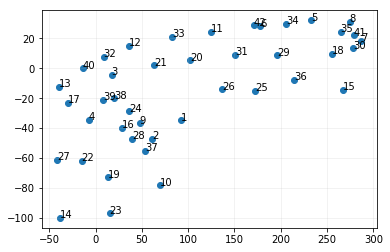

In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

file_name = './map_data.txt'

x_data = []
y_data = []
labels = []

with open(file_name, 'r') as fname:
    for line in fname:
        x_data.append(line.strip().split()[0])
        y_data.append(line.strip().split()[1])
        labels.append(str(line.strip().split()[2]))

plt.scatter(x_data, y_data, marker = 'o')

for label,x,y in zip(labels,x_data, y_data):
    plt.annotate(label,xy = (x,y))
    #plt.annotate((label+ ' ' +str(x)[:3] + ' ' + str(y)[:3]),xy = (x,y))
    

plt.grid(which = 'both')
plt.grid(which = 'minor', alpha = 0.2)
plt.grid(which = 'major', alpha = 0.2)

plt.show()

### Step 2 : Initialisation
The first input data is from (noisy)GPS data {x = 6.2415, y = 2.4264, theta = -0.0146 }

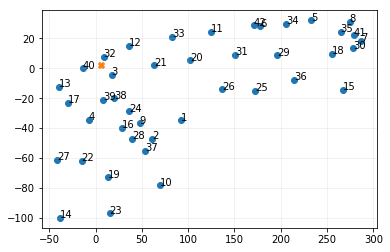

In [2]:
particle_x = 6.2415
particle_y = 2.4264
particle_theta = -0.0146

plt.scatter(x_data, y_data, marker = 'o')
plt.scatter(particle_x,particle_y,marker = 'X') # NOISY GPS DATA

for label,x,y in zip(labels,x_data, y_data):
    plt.annotate(label,xy = (x,y))
    #plt.annotate((label+ ' ' +str(x)[:3] + ' ' + str(y)[:3]),xy = (x,y))
    

plt.grid(which = 'both')
plt.grid(which = 'minor', alpha = 0.2)
plt.grid(which = 'major', alpha = 0.2)

plt.show()

### Step 3 : Assigning particles with normal distribution:

In [particle_filter.cpp](./particle_filter.cpp) ParticleFilter::init, **num_particles** is set to **100**. All the **x,y** and **theta** are assigned with normal distribution with **mean** as noisy GPS data and **std** as **{0.3,0.3,0.01}**

### Step 4 : Predict based on velocity and yaw rate:

Based on the vehicle model, predict the vehicle position. Make sure to include condition for the zero yaw-rate.

### Step 5 : First sensed data

The vehicle senses the landmarks and shares in the vehicle co-ordinates. This needs to transformed to the particle co-ordinate.

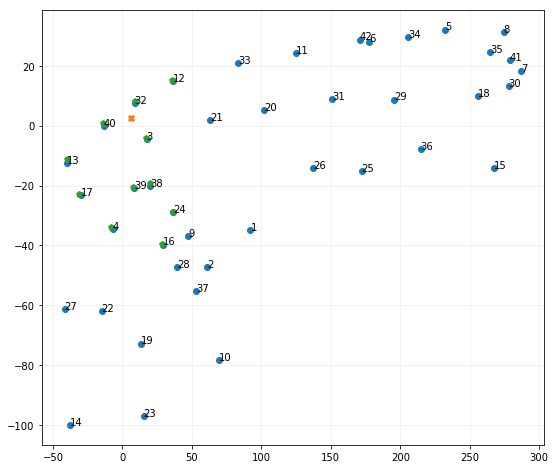

In [3]:
particle_x = 6.2415
particle_y = 2.4264
particle_theta = -0.0146

sense_observations_x = [2.8229,10.8098,-19.9023, 1.6690, 13.7447, 29.2660, -13.8942, 30.4493, -37.0394, 22.6484, -45.6505]
sense_observations_y = [5.8974, -6.5286, -1.9403, -22.7329, -21.5095, 13.2287, -36.4008, -30.9077, -25.7684 ,-41.6736, -14.2155]

transformed_obs_x = []
transformed_obs_y = []

from math import sin, cos

for i in range(len(sense_observations_x)):
    x_ = sense_observations_x[i] * cos(particle_theta) - sense_observations_y[i] * sin(particle_theta) + particle_x
    transformed_obs_x.append(x_)
    y_ = sense_observations_x[i] * sin(particle_theta) + sense_observations_y[i] * cos(particle_theta) + particle_y
    transformed_obs_y.append(y_)

plt.figure(figsize=(9, 8))
plt.scatter(x_data, y_data, marker = 'o')
plt.scatter(particle_x,particle_y,marker = 'X') # NOISY GPS DATA
plt.scatter(transformed_obs_x,transformed_obs_y,marker = 'p')

for label,x,y in zip(labels,x_data, y_data):
    plt.annotate(label,xy = (x,y))
    #plt.annotate((label+ ' ' +str(x)[:3] + ' ' + str(y)[:3]),xy = (x,y))
    

plt.grid(which = 'both')
plt.grid(which = 'minor', alpha = 0.2)
plt.grid(which = 'major', alpha = 0.2)

plt.show()

### Step 6 : updateWeights :
For every particle :
    - Select landmarks only within the sensor range of 50m
    - for every observed/sensed value, transform to particle co-ordinate and find the nearest neighbour.
    - Calculate multiVariate Gaussian Distribution weights for the particle.

### Step 7 : Resampling :
For every cycle of receiving new input , resample using discrete_distribution (supposed to be similar to wheel) which internally normalizes weight and chooses particles as per the magnitude of the weights.

[Forum link](https://discussions.udacity.com/t/resampling-algorithm-using-resampling-wheel/241313/10) : I referred the discussion here for the implementation of discrete_distribution.

## Final output :
![Image](./Particle_Filter.png)